In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import math
import random

In [63]:
PARAM_NAMES = [f'PARAM_{i}' for i in range(44)]

In [2]:
DATA_DIRECTORY = 'raw_data'
data_files_list = os.listdir(DATA_DIRECTORY)[1:]


In [3]:
raw_data = []
for filename in data_files_list:
    raw_data.append( pd.read_csv(f'{DATA_DIRECTORY}/{filename}', sep=';') )


In [4]:
raw_data[0].head()

,DATE_ID,PARAM_0,PARAM_1,PARAM_2,PARAM_3,PARAM_4,PARAM_5,PARAM_6,PARAM_7,PARAM_8,...,PARAM_40,PARAM_41,PARAM_42,PARAM_43,Y_0,Y_1,Y_2,Y_3,Y_4,Y_5
0,0,0.942041,0.673650,0.189707,0.861813,1.000000,0.271811,0.910869,0.180069,0.186220,...,0.936961,0.669668,0.468071,0.410538,0,0,0,0,0,0
1,1,0.950638,0.712803,0.483257,0.871671,0.649818,0.331050,0.927371,0.201512,0.479871,...,0.671885,0.508419,0.484890,0.437528,0,0,0,0,0,0
2,2,0.989547,0.766842,0.609329,0.888103,0.445850,0.402025,0.911342,0.164514,0.606200,...,0.462499,0.667019,0.411059,0.417655,0,0,0,0,0,0
3,3,0.959051,0.597957,0.629704,0.924190,0.501116,0.413762,0.953067,0.161086,0.627351,...,0.463806,0.724389,0.354811,0.343813,0,0,0,0,0,0
4,4,0.938857,0.601864,0.469477,0.924190,0.619562,0.359712,0.978311,0.317954,0.466985,...,0.518529,0.800098,0.435762,0.388015,0,0,0,0,0,0


In [5]:
raw_data_evented = [ [] for i in range(6)]

for data in raw_data:
    for i in range(6):
        if len(data[data[f'Y_{i}'] == 1]) :
            raw_data_evented[i].append(data)

In [6]:
# search_file_index = 2
# raw_data[search_file_index][(raw_data[search_file_index]['Y_0'] == 1) | 
#             (raw_data[search_file_index]['Y_1'] == 1) | 
#             (raw_data[search_file_index]['Y_2'] == 1) |
#             (raw_data[search_file_index]['Y_3'] == 1) |
#             (raw_data[search_file_index]['Y_4'] == 1) |
#             (raw_data[search_file_index]['Y_5'] == 1) 
# ]

In [7]:
[len(data) for data in raw_data_evented]

[100, 98, 163, 6, 65, 161]

In [8]:
len(raw_data)

247

In [120]:
event_0_dataset = raw_data_evented[0].copy()
event_1_dataset = raw_data_evented[1].copy()
event_2_dataset = raw_data_evented[2].copy()
event_3_dataset = raw_data_evented[3].copy()
event_4_dataset = raw_data_evented[4].copy()
event_5_dataset = raw_data_evented[5].copy()

In [123]:
point_one_data = event_2_dataset[8].replace(np.nan, 0)
param_data     = point_one_data[PARAM_NAMES]
events         = point_one_data['Y_2']

<Axes: >

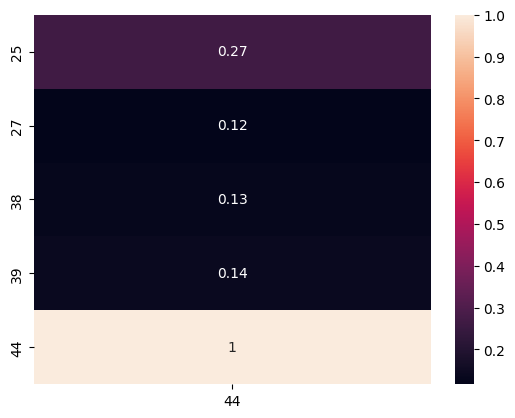

In [124]:
dif_data = []
for line_id in range(1, len(point_one_data)):
    res = point_one_data.iloc[line_id, 1:-6] / (point_one_data.iloc[line_id-1,1:-6]+point_one_data.iloc[line_id, 1:-6])
    res.to_numpy()
    dif_data.append(res)


dif_data = pd.DataFrame(np.array(dif_data))
dif_data[44] = events.to_numpy()[1:]
corr_map = dif_data.corr()[[44, ]]
sns.heatmap(corr_map[corr_map[44] > 0.1], annot=True)

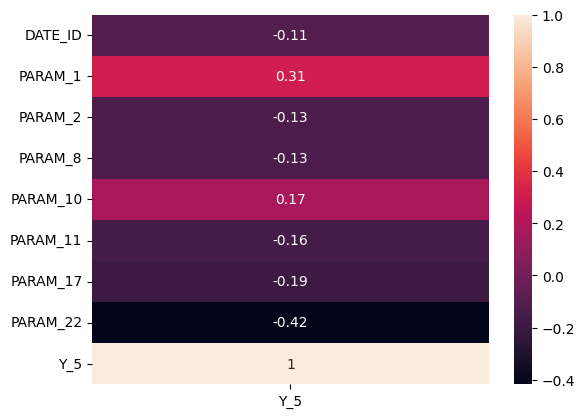

In [130]:
index = 0
SELECTOR_COUNT = 3

corr_Y_5 = event_5_dataset[index].corr()
ax = sns.heatmap(corr_Y_5[abs(corr_Y_5['Y_5']) > .1][['Y_5', ]], annot=True)
    
    

In [53]:
start_index = 20
chain_lenght = 5

chain_sum = event_3_dataset[start_index:start_index+chain_lenght]

corr_Y_0 = chain_sum.corr()
ax = sns.heatmap(corr_Y_0[abs(corr_Y_0['Y_3']) > .2][['Y_3', ]], annot=True)
    

AttributeError: 'int' object has no attribute 'corr'